In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import neighbors

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
    df = pd.read_csv("final_dataset1/processed_dataset1.csv")

In [4]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,Time,Recorded_times,Categorized_times,Categorized_trasaction_purpose,Birth Year,Categorized DOB,Categorized Gender
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.986391,-81.200714,0,2020-06-21 12:14:25,12:14:25,3,3,1968,3,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,39.450498,-109.960431,0,2020-06-21 12:14:33,12:14:33,3,3,1990,4,1
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.495810,-74.196111,0,2020-06-21 12:14:53,12:14:53,3,3,1970,3,1
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.812398,-80.883061,0,2020-06-21 12:15:15,12:15:15,3,4,1987,4,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.959148,-85.884734,0,2020-06-21 12:15:17,12:15:17,3,2,1955,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,39.946837,-91.333331,0,2020-12-31 23:59:07,23:59:07,4,3,1966,3,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.661049,-96.186633,0,2020-12-31 23:59:09,23:59:09,4,1,1999,5,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.658340,-119.715054,0,2020-12-31 23:59:15,23:59:15,4,1,1981,4,1
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.470525,-117.080888,0,2020-12-31 23:59:24,23:59:24,4,2,1965,3,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Time', 'Recorded_times',
       'Categorized_times', 'Categorized_trasaction_purpose', 'Birth Year',
       'Categorized DOB', 'Categorized Gender'],
      dtype='object')

In [6]:
X = df[['merch_lat', 'merch_long']]
y = df['is_fraud']
X = np.array(X)
X
target_names = ['not fraud', 'fraud']
target_names = np.reshape(target_names, (1,-1))[0]
target_names
print(X)

[[  33.986391  -81.200714]
 [  39.450498 -109.960431]
 [  40.49581   -74.196111]
 ...
 [  46.65834  -119.715054]
 [  44.470525 -117.080888]
 [  36.210097  -97.036372]]


In [7]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 70)
#train decision tree

# Create an instance of KNN Classifier and fit the data.
n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [8]:
#evaluation on training data

y_pred = clf.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[553574      0]
 [     0   2145]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      1.00      1.00    555719
weighted avg       1.00      1.00      1.00    555719



In [9]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[166081      0]
 [     0    635]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166081
           1       1.00      1.00      1.00       635

    accuracy                           1.00    166716
   macro avg       1.00      1.00      1.00    166716
weighted avg       1.00      1.00      1.00    166716



Text(0.5, 1.0, '2-Class classification with KNN- Training Data')

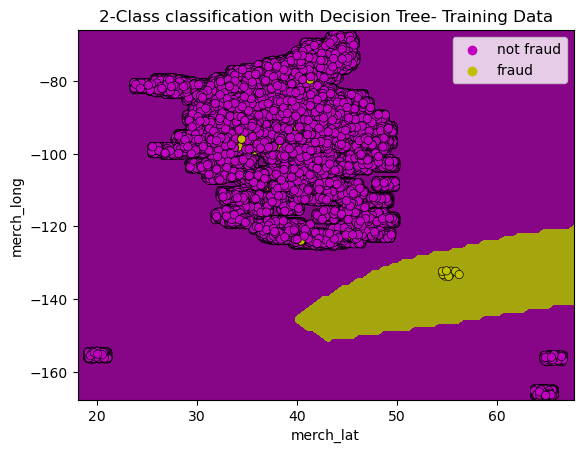

In [10]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='merch_lat',
    ylabel='merch_long',
)

# Plot training data

sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=target_names[y_train],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with KNN- Training Data")

Text(0.5, 1.0, '2-Class classification with KNN- Training Data')

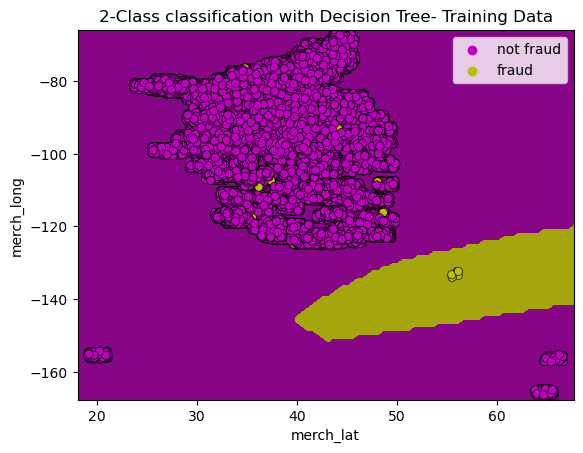

In [11]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='merch_lat',
    ylabel='merch_long',
)

# Plot testing data

sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=target_names[y_test],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with KNN- Training Data")